# Proyecto: Análisis Exploratorio Datos Precio de las casas en Ecuador

Primero importamos las librerías que necesitamos para analizar los datos.
Los datos son provistos por Properati

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Cargamos los datos y lo convertimos en un DataFrame.

In [ ]:
df=pd.read_csv("/work/ec_properties.csv")

Ahora realizaremos una exploración de los datos. Vemos la dimensión de los datos, la información y podemos observar las cinco primeras filas del DataFrame.

In [ ]:
df.shape

(288984, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288984 entries, 0 to 288983
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               288984 non-null  object 
 1   ad_type          288984 non-null  object 
 2   start_date       288984 non-null  object 
 3   end_date         288984 non-null  object 
 4   created_on       288984 non-null  object 
 5   lat              236119 non-null  float64
 6   lon              236119 non-null  float64
 7   l1               288984 non-null  object 
 8   l2               288984 non-null  object 
 9   l3               282006 non-null  object 
 10  l4               177032 non-null  object 
 11  l5               106174 non-null  object 
 12  l6               15260 non-null   object 
 13  rooms            7557 non-null    float64
 14  bedrooms         63245 non-null   float64
 15  bathrooms        223696 non-null  float64
 16  surface_total    872 non-null     floa

In [ ]:
df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,RLZFeg9z6OGDE2loI6Fg8Q==,Propiedad,2020-12-18,2021-02-19,2020-12-18,-1.826847,-80.752973,Ecuador,Santa Elena,NaN,...,5.0,NaN,NaN,650000.0,USD,NaN,Estilo y Lujo: Casa con Impresionantes Vistas ...,<b>Estilo y Lujo: Casa con Impresionantes Vist...,Casa,Venta
1,msKV5of/C1c+VLKVXBBbsg==,Propiedad,2020-12-18,2021-02-19,2020-12-18,-2.161069,-80.793480,Ecuador,Santa Elena,NaN,...,4.0,NaN,NaN,340000.0,USD,NaN,Se Vende Casa Amplia en Punta Barandua Cerca d...,<b>Se Vende Casa Amplia en Punta Barandua Cerc...,Casa,Venta
2,gS+j6v6MUUrb05wnyTHpsA==,Propiedad,2020-12-18,2021-02-19,2020-12-18,-2.324663,-80.854766,Ecuador,Santa Elena,NaN,...,4.0,NaN,NaN,585000.0,USD,NaN,24 Hectares Plus Brand New Home,<b>24 Hectares Plus Brand New Home</b><br><br>...,Casa,Venta
3,aiS999T0eDkOpdXIrN8LhA==,Propiedad,2020-12-18,2021-02-19,2020-12-18,-1.796602,-80.757516,Ecuador,Guayas,NaN,...,3.0,NaN,NaN,475000.0,USD,NaN,En Venta: Casa Frente Al Mar en Olón,<b>En Venta: Casa Frente Al Mar en Olón</b><br...,Casa,Venta
4,IsoXIavyucyHo901DZdquA==,Propiedad,2020-12-18,2021-02-19,2020-12-18,-1.850675,-80.745841,Ecuador,Santa Elena,NaN,...,5.0,NaN,NaN,1050000.0,USD,NaN,En Venta: Casa Inglesa Vía Dos Mangas - Mangla...,<b>En Venta: Casa Inglesa Vía Dos Mangas - Man...,Casa,Venta


En el apartado de la información podemos ver que hay varios campos que están nulos. 
Veamos a qué años corresponde la información de la que disponemos:

In [ ]:
years=pd.DatetimeIndex(df['start_date']).year.unique()
years

Int64Index([2020, 2021], dtype='int64', name='start_date')

Los datos corresponden a los años 2020 y 2021. Ahora crearemos un nuevo DataFrame en el que se constará la información que necesitamos. Como vamos a analizar la información sobre las ventas de casas y casas de campo, seleccionaremos las entrade que correspondan a estas opciones.

In [ ]:
df["currency"].value_counts()

USD    288308
ARS         1
Name: currency, dtype: int64

In [ ]:
df["property_type"].unique()

array(['Casa', 'Lote', 'Otro', 'Oficina', 'Departamento',
       'Local comercial', 'Depósito', 'PH', 'Casa de campo', 'Garaje'],
      dtype=object)

In [ ]:
casa=["Casa",  "Casa de campo"]

dft = df[df["currency"]=="USD"]

dft = dft[dft["property_type"].isin(casa)] 

dft = dft[dft["operation_type"]=="Venta"]

dft = dft[["property_type","title","lat","lon","l2","price"] ]

dft = dft.rename(index=str, columns={"l2":"province"})

dft=dft[dft["price"]!=0]

dft=dft[dft["price"]>=20000]

dft=dft[dft["price"]<=500000]

dft.drop_duplicates(inplace=True)

#dft.dropna(inplace=True)

dft.reset_index(drop=True, inplace=True)


In [ ]:
dft.head()

,property_type,title,lat,lon,province,price
0,Casa,Se Vende Casa Amplia en Punta Barandua Cerca d...,-2.161069,-80.793480,Santa Elena,340000.0
1,Casa,En Venta: Casa Frente Al Mar en Olón,-1.796602,-80.757516,Guayas,475000.0
2,Casa,Located in Olonche - olon'S Premier Urbanizati...,-1.796602,-80.757516,Guayas,135000.0
3,Casa,Vendo casa nueva de 2 departamento en Sauces N...,-3.939269,-79.225064,Loja,92000.0
4,Casa,Venta Casa de Estreno Urb. Vilanova; Vía Salit...,-1.862180,-79.977669,Guayas,136900.0


In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42613 entries, 0 to 42612
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  42613 non-null  object 
 1   title          42613 non-null  object 
 2   lat            36369 non-null  float64
 3   lon            36369 non-null  float64
 4   province       42613 non-null  object 
 5   price          42613 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.0+ MB


Realizamos un gráfico para observar como están distribuidas las propiedades.

In [ ]:
fig = px.scatter_mapbox(
    dft,
    lat="lat",
    lon="lon",
    center={"lat": -0.225219, "lon": -78.5248},  # Map will be centered on Brazil
    width=600,
    height=600,
    color="price",
    hover_data=["price"],  # Display price when hovering mouse over house
    
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

En el gráfico podemos observar en cada ciudad del Ecuador las casas que están disponibles para la venta. Además se usa una escala de colores para diferenciar el precio de las viviendas. Las casas que están representadas con el color amarillo son las más caras, mientras que las casas que se indican con el color morado son las más baratas.

Haremos un boxplot para analizar como están distribuidos los datos.

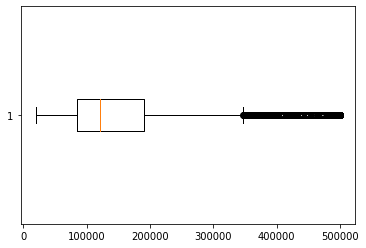

In [ ]:
plt.boxplot(dft["price"], vert=False);

Vemos que hay algunos datos que son outliers, pero es normal, pues son propiedades más caras. 

A continación usamos en método describe para ver la media del precio de las casas, así como la desviación estándar, los precios mínimos, los precios máximos.

In [ ]:
dft["price"].describe()

count     42613.000000
mean     151663.259240
std       95872.777799
min       20000.000000
25%       85000.000000
50%      122000.000000
75%      190000.000000
max      500000.000000
Name: price, dtype: float64

Graficamos un histograma para conocer la distribución de los precios. Podemos observar que los datos tienen un sesgo hacia la izquierda, pues la mediana es menor a la media.

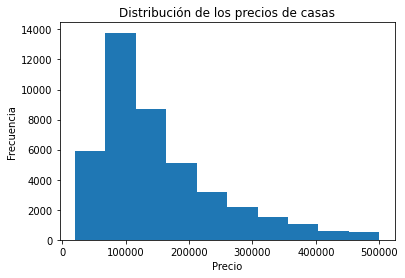

In [ ]:
plt.hist(dft["price"]);
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.title("Distribución de los precios de casas");

In [ ]:
precio_medio_por_provincia = dft.groupby("province")["price"].mean().sort_values(ascending=False)

Ahora realizamos un gráfico de barras para conocer el precio medio de las viviendas por provinica. Podemos observar que Pichincha, Azuay y Galápagos son las provincias cuyo precio medio es el más alto. Así mismo podemos ver que en las provincias de Orellana, Pastaza y Sucumbíos tenemos los precios más bajos.

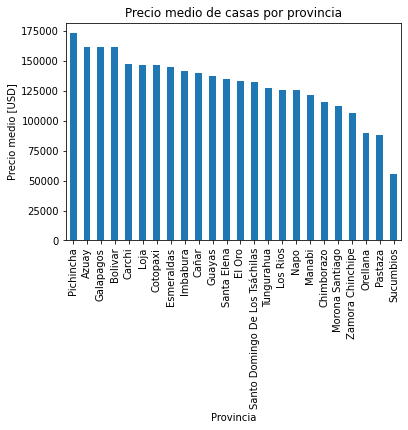

In [ ]:
precio_medio_por_provincia.plot(
    kind="bar",
    xlabel="Provincia",
    ylabel="Precio medio [USD]",
    title="Precio medio de casas por provincia"
);


Ahora partiendo del primer Data Frame df obtenemos un nuevo Data Frame dfa en el cual tendremos solo las casas que tengan un valor en la columna de "surface_total", esto lo realizamos para poder investigar si existe o no correlación entre el precio de las viviendas y el área. 

In [ ]:
dfa=df[df["surface_total"]!=0]

In [ ]:
dfa

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,RLZFeg9z6OGDE2loI6Fg8Q==,Propiedad,2020-12-18,2021-02-19,2020-12-18,-1.826847,-80.752973,Ecuador,Santa Elena,NaN,...,5.0,NaN,NaN,650000.0,USD,NaN,Estilo y Lujo: Casa con Impresionantes Vistas ...,<b>Estilo y Lujo: Casa con Impresionantes Vist...,Casa,Venta
1,msKV5of/C1c+VLKVXBBbsg==,Propiedad,2020-12-18,2021-02-19,2020-12-18,-2.161069,-80.793480,Ecuador,Santa Elena,NaN,...,4.0,NaN,NaN,340000.0,USD,NaN,Se Vende Casa Amplia en Punta Barandua Cerca d...,<b>Se Vende Casa Amplia en Punta Barandua Cerc...,Casa,Venta
2,gS+j6v6MUUrb05wnyTHpsA==,Propiedad,2020-12-18,2021-02-19,2020-12-18,-2.324663,-80.854766,Ecuador,Santa Elena,NaN,...,4.0,NaN,NaN,585000.0,USD,NaN,24 Hectares Plus Brand New Home,<b>24 Hectares Plus Brand New Home</b><br><br>...,Casa,Venta
3,aiS999T0eDkOpdXIrN8LhA==,Propiedad,2020-12-18,2021-02-19,2020-12-18,-1.796602,-80.757516,Ecuador,Guayas,NaN,...,3.0,NaN,NaN,475000.0,USD,NaN,En Venta: Casa Frente Al Mar en Olón,<b>En Venta: Casa Frente Al Mar en Olón</b><br...,Casa,Venta
4,IsoXIavyucyHo901DZdquA==,Propiedad,2020-12-18,2021-02-19,2020-12-18,-1.850675,-80.745841,Ecuador,Santa Elena,NaN,...,5.0,NaN,NaN,1050000.0,USD,NaN,En Venta: Casa Inglesa Vía Dos Mangas - Mangla...,<b>En Venta: Casa Inglesa Vía Dos Mangas - Man...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288979,ocjF06+5rK9kCTT52ugsEA==,Propiedad,2020-11-24,2020-11-24,2020-11-24,-2.218832,-79.888608,Ecuador,Guayas,Guayaquil,...,3.0,NaN,NaN,750.0,USD,NaN,Rento casa amoblada villa club,Casa amoblada totalmente,Casa,Alquiler
288980,7FD5EbRqI9Y1cXs8Ou9iaA==,Propiedad,2020-11-24,2020-11-26,2020-11-24,-2.217266,-79.892950,Ecuador,Guayas,Guayaquil,...,1.0,NaN,NaN,250.0,USD,NaN,Suite en Barrio centenario,Inmoquil pone a su disposicion una suite ubica...,Departamento,Alquiler
288981,iZP7vrjMrC/aSCNMnaAObQ==,Propiedad,2020-11-24,2021-09-14,2020-11-24,NaN,NaN,Ecuador,Guayas,Guayaquil,...,1.0,NaN,NaN,250.0,USD,NaN,SUITE EN ALQUILER -CENTRO DE GUAYAQUIL - UNIVE...,<b>SUITE EN ALQUILER -CENTRO DE GUAYAQUIL - UN...,Departamento,Alquiler
288982,RX/oriAfxzULD+OjgLhWMg==,Propiedad,2020-11-24,2020-11-24,2020-11-24,-2.217266,-79.892950,Ecuador,Guayas,Guayaquil,...,1.0,NaN,NaN,250.0,USD,NaN,Suite en Barrio centenario,Inmoquil pone a su disposicion una suite ubica...,Departamento,Alquiler


In [ ]:
casa=["Casa",  "Casa de campo"]

dfa = dfa[dfa["currency"]=="USD"]

dfa = dfa[dfa["property_type"].isin(casa)] 

dfa = dfa[dfa["operation_type"]=="Venta"]

dfa = dfa[["property_type","surface_total","title","lat","lon","l2","price"] ]

dfa = dfa.rename(index=str, columns={"l2":"province"})

dfa = dfa[dfa["price"]!=0]

dfa = dfa[dfa["price"]>=20000]

dfa = dfa[dfa["price"]<=500000]

dfa.drop_duplicates(inplace=True)

dfa.dropna(inplace=True)

dfa.reset_index(drop=True, inplace=True)

In [ ]:
low,high=dfa["surface_total"].quantile([0,0.9])

dfa=dfa[dfa["surface_total"].between(low,high)]

Realizamos un scatter plot de Precio vs Area, en este podemos observar que existe una correlación entre ambas variables. A mayor área el precio de la casa es mayor.

Text(0.5, 1.0, 'Precio vs. Área')

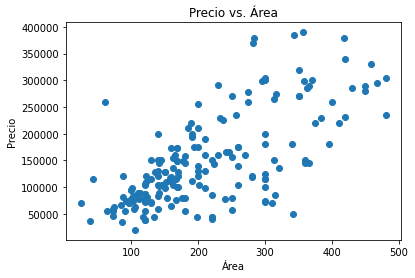

In [ ]:
plt.scatter(x=dfa["surface_total"], y=dfa["price"])
plt.xlabel("Área")
plt.ylabel("Precio")
plt.title("Precio vs. Área")

In [ ]:
dfa["price"].corr(dfa["surface_total"])

0.6933908425934859

Por último, con el método .corr() podemos observar que la correlación entre el precio de la casa y la superficie total es de 0.69. Es decir, existe una alta correlación entre ambas variables.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c45123bf-2968-4036-87e8-33e7a6381aaa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>